<h1 style='text-align: center; color: blue;'>DS 203 Assignment 5: EDA and Data Visualization</h1>
<h3 style='text-align: right; color: red;'>~ Shubham Lohiya, 18D100020</h3>

### Make required imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy, skew
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

## Question 1(a)

### Read Data

In [2]:
data = pd.read_csv('master.csv', thousands=',')
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


### EDA

#### Number of records in data

In [3]:
len(data)

27820

####  Number of variables in data and their datatypes

In [4]:
data.info()
# It is abundantly clear from the output that we have 12 variables in our data
# We also see the datatype of each variable (Note 'object' dtype is 'str' data in our case)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  int64  
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.5+ MB


#### Number of unique values for each attribute

In [5]:
print("Unique Value Count Summary:\n")
for attr in data.columns:
    print(f'{attr}: {len(data[attr].unique())}')

Unique Value Count Summary:

country: 101
year: 32
sex: 2
age: 6
suicides_no: 2084
population: 25564
suicides/100k pop: 5298
country-year: 2321
HDI for year: 306
 gdp_for_year ($) : 2321
gdp_per_capita ($): 2233
generation: 6


#### Data scales of variables in data

| Variable      | Data Scale |
| ----------- | ----------- |
| **country** | Nominal |
| **year** | Temporal |
| **sex** | Nominal |
| **age** | Ordinal |
| **suicides_no** | Integer |
| **population** | Integer |
| **suicides/100k pop** | Continuous |
| **country-year** | Nominal |
| **HDI for year** | Continuous |
|  **gdp_for_year (\\$)** | Integer |
| **gdp_per_capita (\\$)** | Integer |
| **generation** | Nominal |

#### Number of missing entries for each variable

In [6]:
print("Missing Entries per variable:\n")
for attr in data.columns:
    print(f'{attr}: {sum(data[attr].isnull())}')

Missing Entries per variable:

country: 0
year: 0
sex: 0
age: 0
suicides_no: 0
population: 0
suicides/100k pop: 0
country-year: 0
HDI for year: 19456
 gdp_for_year ($) : 0
gdp_per_capita ($): 0
generation: 0


#### Number of records with no missing entries

In [7]:
len(data.dropna()) # drops rows with missing values for any of the columns

8364

## Question 1(b)

### Discrete Variables

#### Age Data

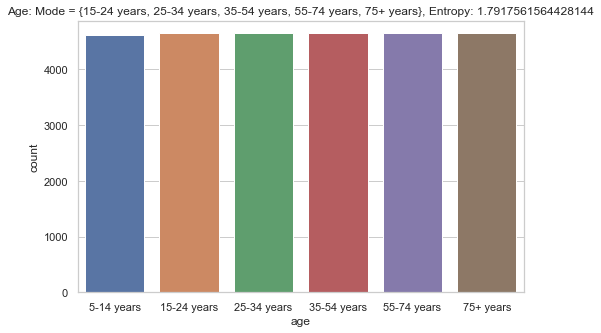

In [8]:
attr = 'age'
plt.figure(figsize=(8,5))
sns.countplot(x=data[attr], order=['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'])
p = data[attr].value_counts()
plt.title(f'{attr.title()}: Mode = {{{", ".join(map(str, data[attr].mode()))}}}, Entropy: {entropy(p/sum(p))}')
plt.show()

#### Country Data

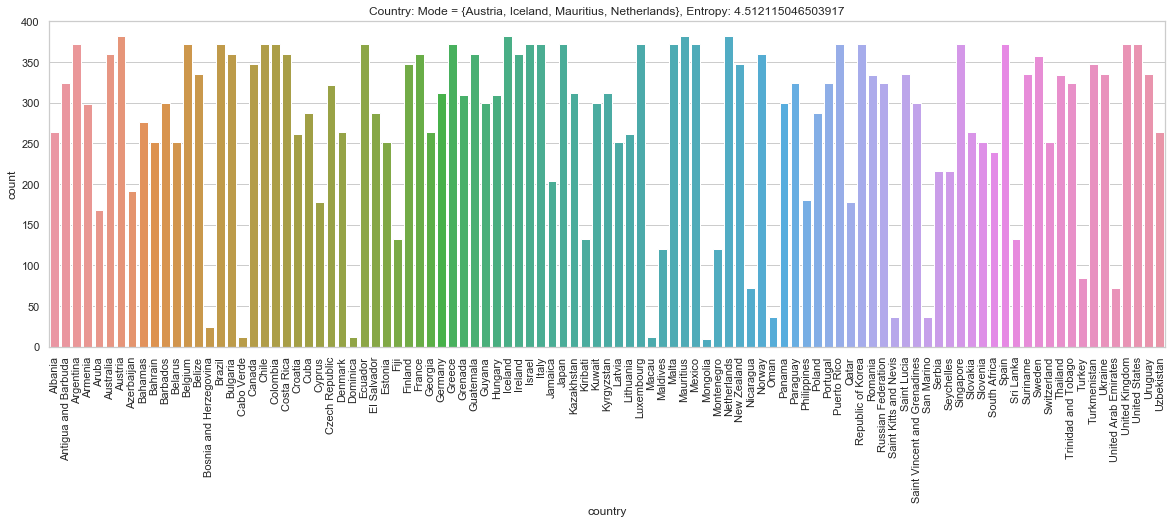

In [9]:
attr = 'country'
plt.figure(figsize=(20,6))
sns.countplot(x=data[attr])
plt.xticks(rotation=90)
p = data[attr].value_counts()
plt.title(f'{attr.title()}: Mode = {{{", ".join(map(str, data[attr].mode()))}}}, Entropy: {entropy(p/sum(p))}')
plt.show()

#### Generation Data

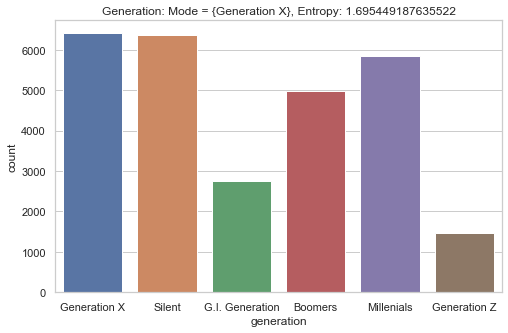

In [10]:
attr = 'generation'
plt.figure(figsize=(8,5))
sns.countplot(x=data[attr])
p = data[attr].value_counts()
plt.title(f'{attr.title()}: Mode = {{{", ".join(map(str, data[attr].mode()))}}}, Entropy: {entropy(p/sum(p))}')
plt.show()

#### Sex Data

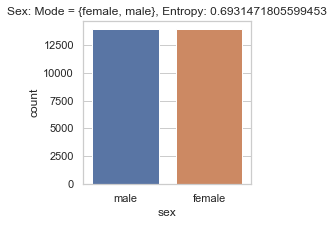

In [11]:
attr = 'sex'
plt.figure(figsize=(3,3))
sns.countplot(x=data[attr])
p = data[attr].value_counts()
plt.title(f'{attr.title()}: Mode = {{{", ".join(map(str, data[attr].mode()))}}}, Entropy: {entropy(p/sum(p))}')
plt.show()

#### Year Data

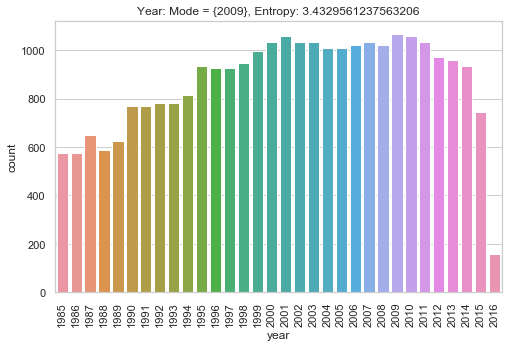

In [12]:
attr = 'year'
plt.figure(figsize=(8,5))
sns.countplot(x=data[attr])
plt.xticks(rotation=90)
p = data[attr].value_counts()
plt.title(f'{attr.title()}: Mode = {{{", ".join(map(str, data[attr].mode()))}}}, Entropy: {entropy(p/sum(p))}')
plt.show()

## Question 1(c)

### Continuous Variables

In [13]:
def plot_hist(data, attr, bins=[None]*3, log=False):
    for b in bins:
        b = 'auto' if b is None else b
        g = sns.histplot(data[attr], bins=b)
        if log: g.set_yscale("log")
        b = b if b != 'auto' else 'optimal'
        plt.title(f'{attr} histogram: {b} bins')
        plt.show()
    
def get_stats(data, attr):
    stats = data.describe()[attr]
    stats['variance'] = stats['std']**2
    stats['inter-quartile range'] = stats['75%'] - stats['25%']
    stats['median'] = stats['50%']
    stats['skew'] = skew(data[attr])
    return stats[['mean', 'variance', 'skew', 'min', '25%', 'median', '75%', 'max', 'inter-quartile range']]

def continuous_var_analysis(data, attr, bins=[None]*3, log=False):
    # Data Statistics
    print(get_stats(data, attr))

    # Box plot
    plt.figure(figsize = (10, 3))
    g = sns.boxplot(x=data[attr])
    if log: g.set_xscale("log")
    plt.title(f'Box-whisker plot for {attr}')
    plt.show()

    # histograms
    plot_hist(data, attr, bins=bins)

    # Goodness of fit test: Normal Distribution, Method: qqplot
    sm.qqplot(data[attr], line='s')
    plt.title(f'{attr} - Goodness of fit Test for Normal Distribution\n')
    plt.show()

    # Goodness of fit test: Log-Normal Distribution, Method: qqplot
    sm.qqplot(data[attr], dist=stats.lognorm, line='s', distargs=(1,))
    plt.title(f'{attr} - Goodness of fit Test for Log-Normal Distribution\n')
    plt.show()

    # alpha level is 0.05 for all p-value tests
    pval = stats.kstest(data[attr], "norm", stats.norm.fit(data[attr])).pvalue
    res = '' if pval < 0.05 else 'cannot '
    print(f'As p-value is {pval}, we {res}reject the hypothesis that data belongs to a Normal Distribution')

    pval = stats.kstest(data[attr], "lognorm", stats.lognorm.fit(data[attr])).pvalue
    res = '' if pval < 0.05 else 'cannot '
    print(f'As p-value is {pval}, we {res}reject the hypothesis that data belongs to a Log-Normal Distribution')

#### Number of Suicides Data

mean                       242.574407
variance                813690.444264
skew                        10.352352
min                          0.000000
25%                          3.000000
median                      25.000000
75%                        131.000000
max                      22338.000000
inter-quartile range       128.000000
Name: suicides_no, dtype: float64


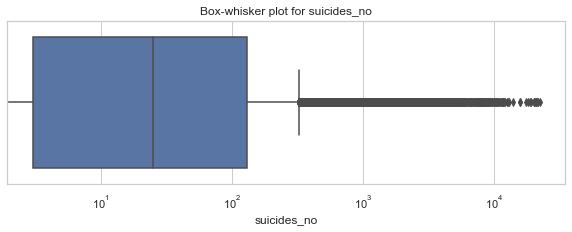

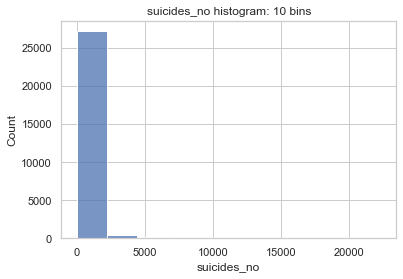

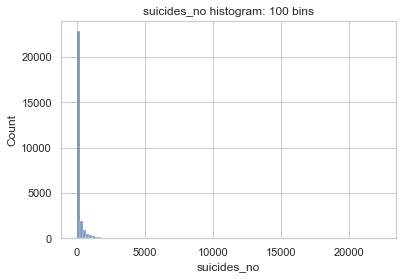

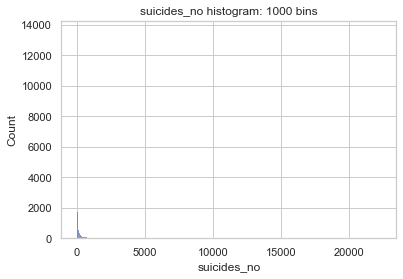

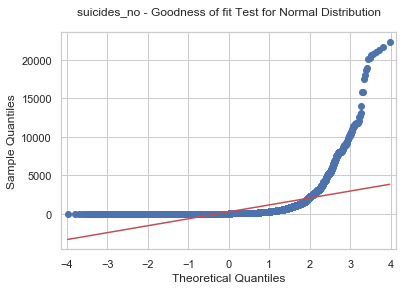

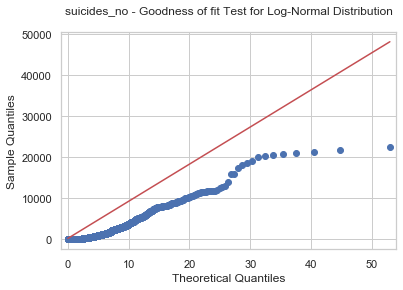

As p-value is 0.0, we reject the hypothesis that data belongs to a Normal Distribution
As p-value is 0.0, we reject the hypothesis that data belongs to a Log-Normal Distribution


In [14]:
attr = 'suicides_no'
continuous_var_analysis(data, attr, bins=[10, 100, 1000], log=True)

Thus we can [infer](https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot) from the first Q-Q plot that the data is **right-skewed**

#### Population Data

mean                    1.844794e+06
variance                1.530202e+13
skew                    4.459174e+00
min                     2.780000e+02
25%                     9.749850e+04
median                  4.301500e+05
75%                     1.486143e+06
max                     4.380521e+07
inter-quartile range    1.388645e+06
Name: population, dtype: float64


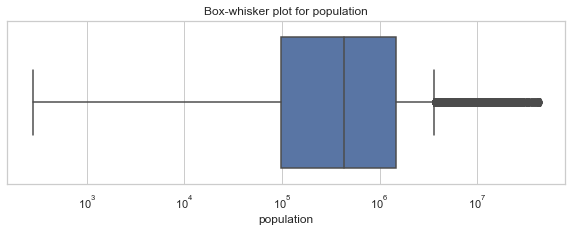

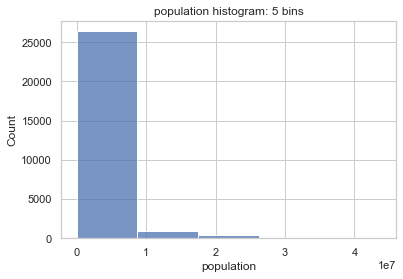

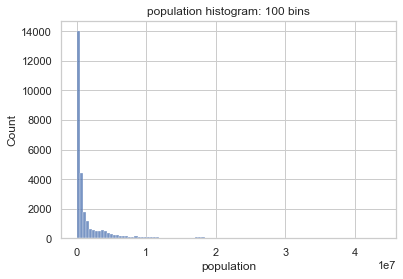

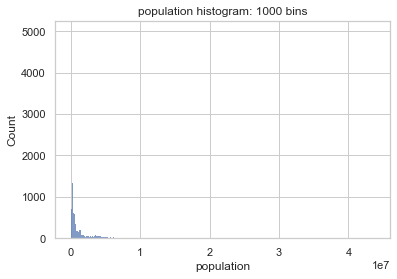

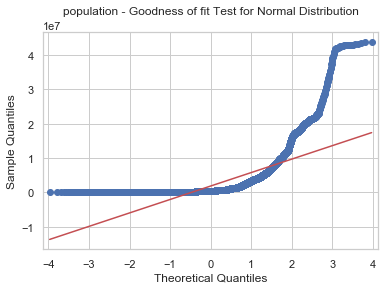

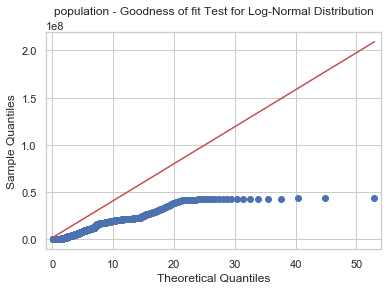

As p-value is 0.0, we reject the hypothesis that data belongs to a Normal Distribution
As p-value is 4.525644130972939e-155, we reject the hypothesis that data belongs to a Log-Normal Distribution


In [15]:
attr = 'population'
continuous_var_analysis(data, attr, bins=[5, 100, 1000], log=True)

Thus we can [infer](https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot) from the first Q-Q plot that the data is **right-skewed**

#### Suicide Density Data

mean                     12.816097
variance                359.538900
skew                      2.963255
min                       0.000000
25%                       0.920000
median                    5.990000
75%                      16.620000
max                     224.970000
inter-quartile range     15.700000
Name: suicides/100k pop, dtype: float64


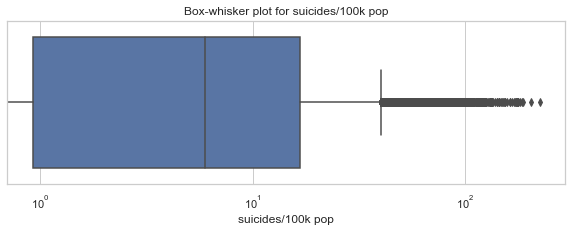

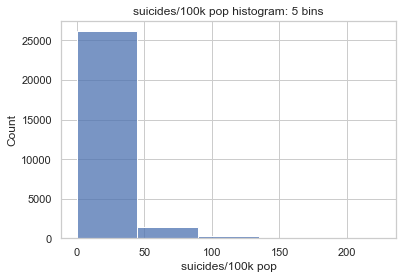

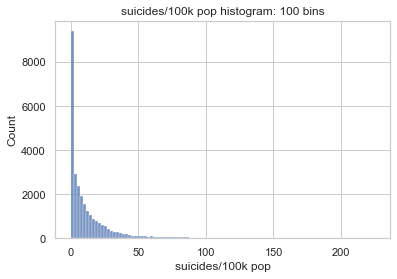

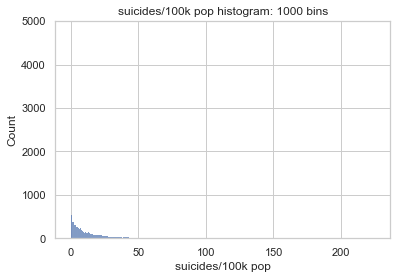

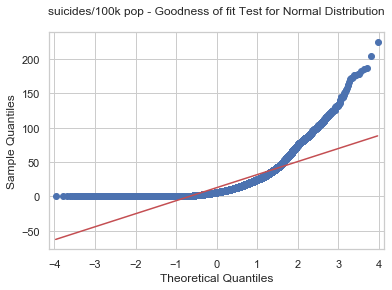

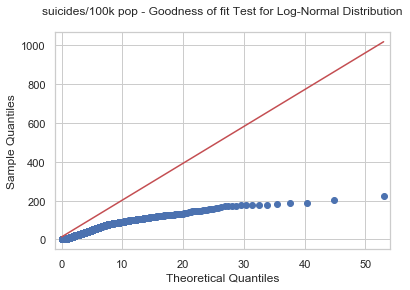

As p-value is 0.0, we reject the hypothesis that data belongs to a Normal Distribution
As p-value is 0.0, we reject the hypothesis that data belongs to a Log-Normal Distribution


In [16]:
attr = 'suicides/100k pop'
continuous_var_analysis(data, attr, bins=[5, 100, 1000], log=True)

Thus we can [infer](https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot) from the first Q-Q plot that the data is **right-skewed**

#### HDI Data

mean                    0.776601
variance                0.008717
skew                   -0.300823
min                     0.483000
25%                     0.713000
median                  0.779000
75%                     0.855000
max                     0.944000
inter-quartile range    0.142000
Name: HDI for year, dtype: float64


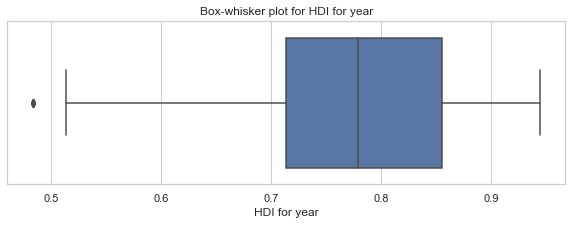

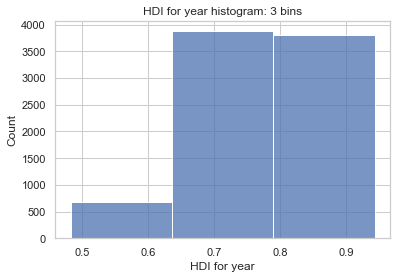

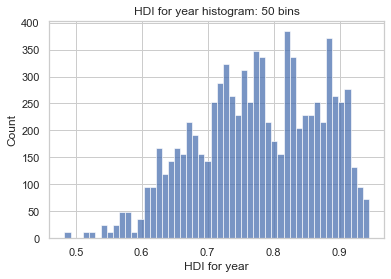

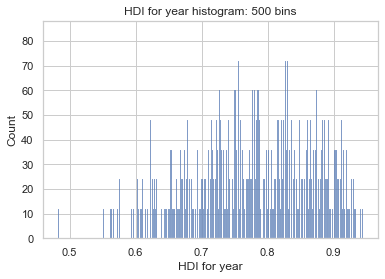

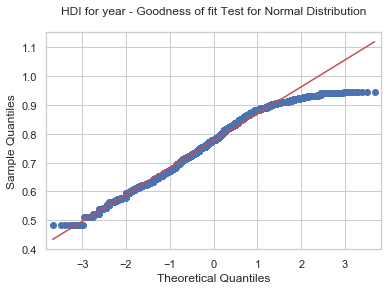

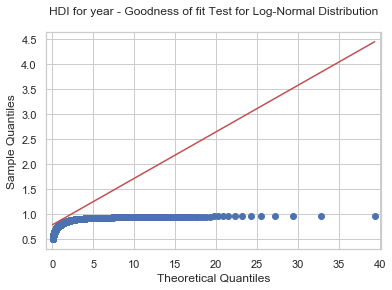

As p-value is 3.8087050287510333e-23, we reject the hypothesis that data belongs to a Normal Distribution
As p-value is 6.128930866349754e-23, we reject the hypothesis that data belongs to a Log-Normal Distribution


In [17]:
attr = 'HDI for year'
continuous_var_analysis(data.dropna(), attr, bins=[3, 50, 500])

Thus we can [infer](https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot) from the first Q-Q plot that the data is slightly **left-skewed**

#### GDP for year Data

mean                    4.455810e+11
variance                2.112982e+24
skew                    7.233365e+00
min                     4.691962e+07
25%                     8.985353e+09
median                  4.811469e+10
75%                     2.602024e+11
max                     1.812071e+13
inter-quartile range    2.512171e+11
Name:  gdp_for_year ($) , dtype: float64


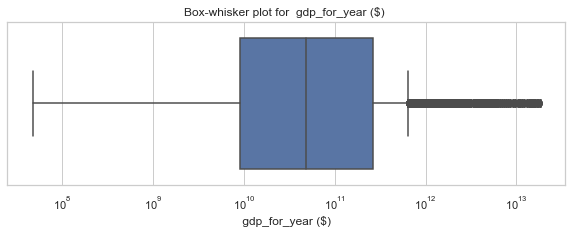

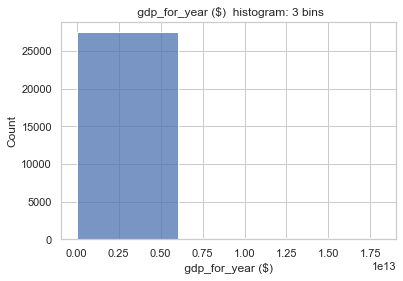

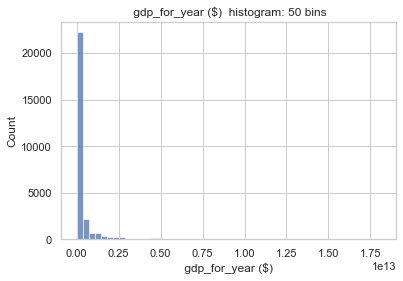

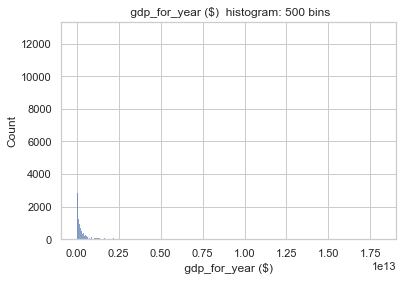

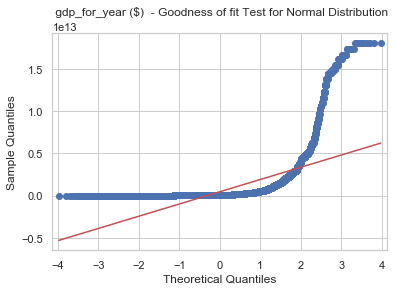

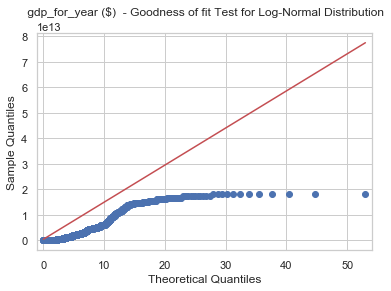

As p-value is 0.0, we reject the hypothesis that data belongs to a Normal Distribution
As p-value is 4.491116530308547e-29, we reject the hypothesis that data belongs to a Log-Normal Distribution


In [18]:
attr = ' gdp_for_year ($) '
continuous_var_analysis(data, attr, bins=[3, 50, 500], log=True)

Thus we can [infer](https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot) from the first Q-Q plot that the data is **right-skewed**

#### GDP per capita Data

mean                    1.686646e+04
variance                3.567405e+08
skew                    1.963364e+00
min                     2.510000e+02
25%                     3.447000e+03
median                  9.372000e+03
75%                     2.487400e+04
max                     1.263520e+05
inter-quartile range    2.142700e+04
Name: gdp_per_capita ($), dtype: float64


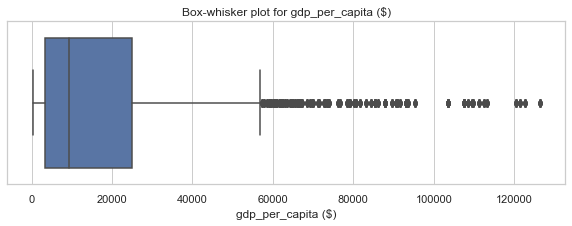

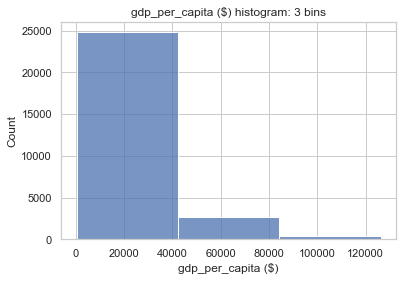

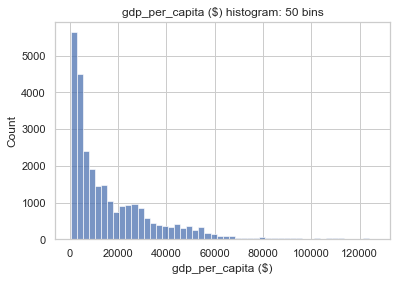

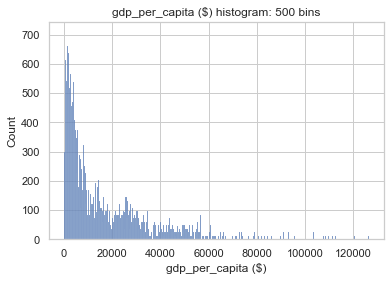

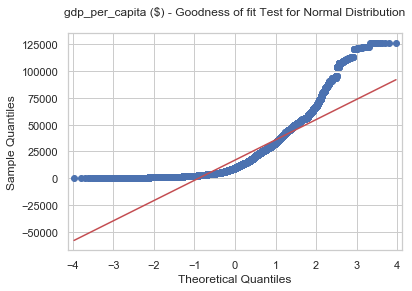

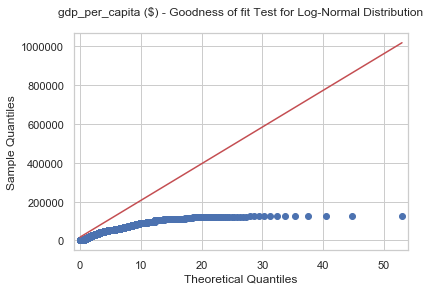

As p-value is 0.0, we reject the hypothesis that data belongs to a Normal Distribution
As p-value is 0.0, we reject the hypothesis that data belongs to a Log-Normal Distribution


In [19]:
attr = 'gdp_per_capita ($)'
continuous_var_analysis(data, attr, bins=[3, 50, 500])

Thus we can [infer](https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot) from the first Q-Q plot that the data is **right-skewed**

## Question 1(d)

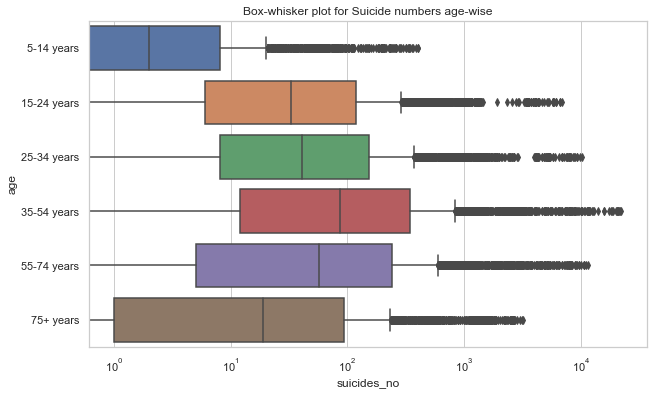

In [20]:
plt.figure(figsize = (10, 6))
g = sns.boxplot(x='suicides_no', y="age", data=data, order=['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'])
g.set_xscale("log")
plt.title(f'Box-whisker plot for Suicide numbers age-wise')
plt.show()

Thus we see that *youth* and *middle-aged adults* seem more likely to commit suicide than *infants* or *old people*.

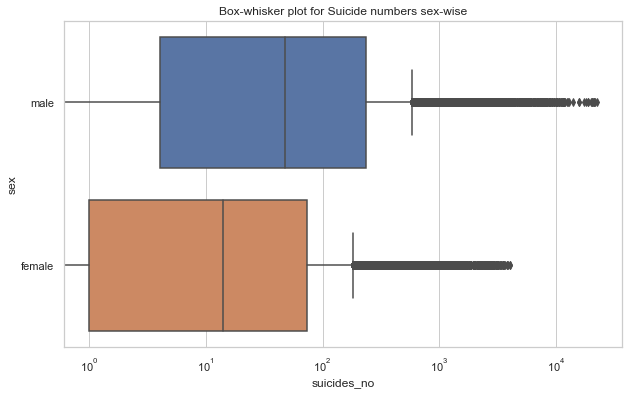

In [21]:
plt.figure(figsize = (10, 6))
g = sns.boxplot(x='suicides_no', y="sex", data=data)
g.set_xscale("log")
plt.title(f'Box-whisker plot for Suicide numbers sex-wise')
plt.show()

Thus we see that *males* seem more likely to commit suicide than *females*.

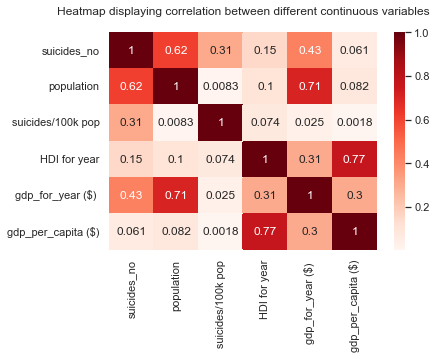

In [22]:
continuous = ['suicides_no', 'population', 'suicides/100k pop', 'country-year',
              'HDI for year', ' gdp_for_year ($) ', 'gdp_per_capita ($)']

sns.heatmap(data[continuous].corr(), cmap="Reds", annot=True)
plt.title('Heatmap displaying correlation between different continuous variables\n')
plt.show()

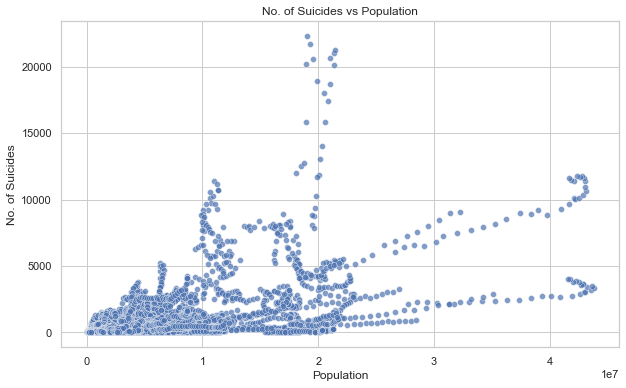

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(y=data.suicides_no, x=data.population, alpha=0.7)
plt.xlabel('Population')
plt.ylabel('No. of Suicides')
plt.title('No. of Suicides vs Population')
plt.show()

## Question 2

In [24]:
top6_countries_suicides = dict(data.groupby('country').suicides_no.mean().sort_values(ascending=False).iloc[:6])
top6_countries_suicides

{'Russian Federation': 3733.7716049382716,
 'United States': 2779.6048387096776,
 'Japan': 2169.0913978494623,
 'Ukraine': 952.2321428571429,
 'Germany': 933.5320512820513,
 'France': 914.2416666666667}

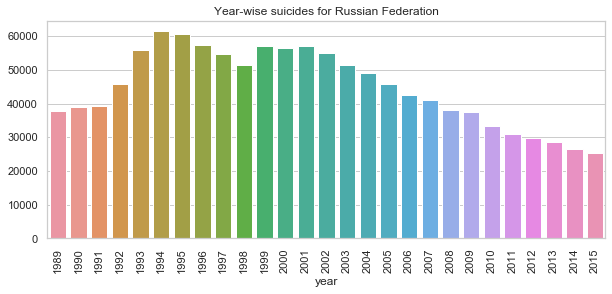

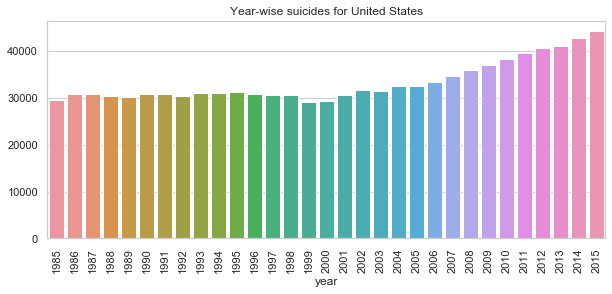

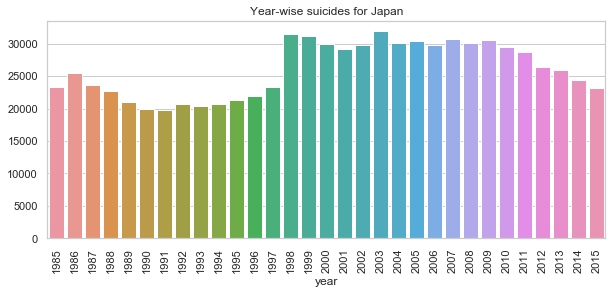

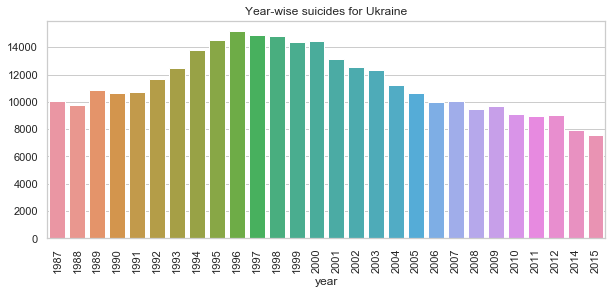

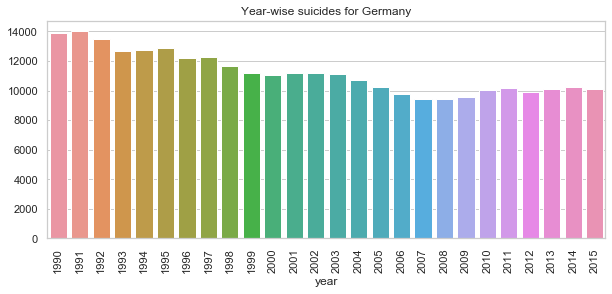

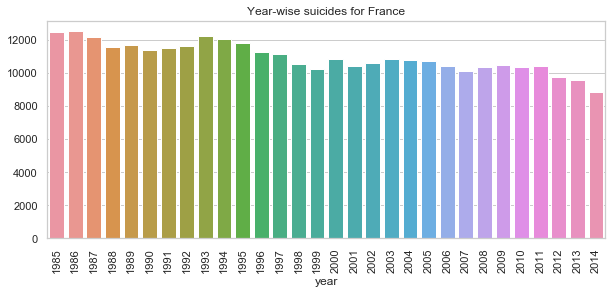

In [25]:
for country in top6_countries_suicides:
    plt.figure(figsize=(10, 4))
    dat = data[data.country == country].groupby('year').suicides_no.sum().sort_index()
    sns.barplot(x=dat.index, y=dat.values)
    plt.title(f'Year-wise suicides for {country}')
    plt.xticks(rotation=90)
    plt.show()

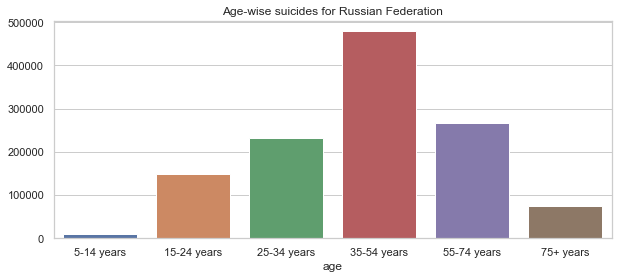

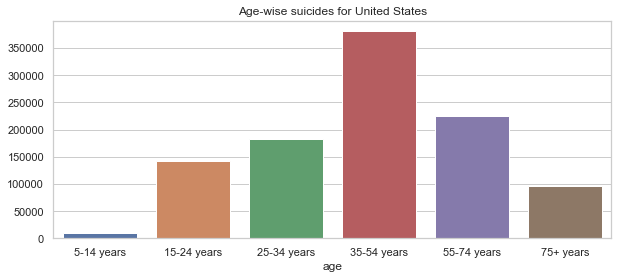

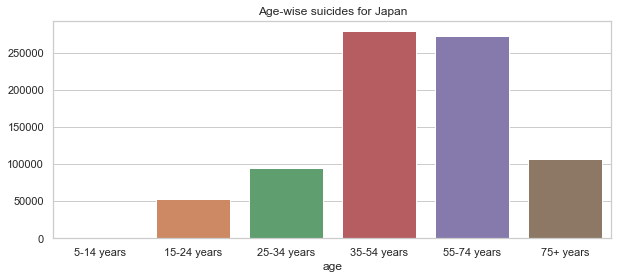

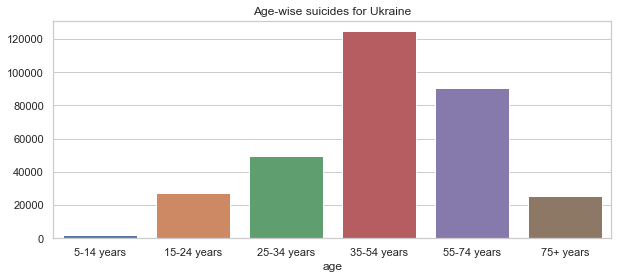

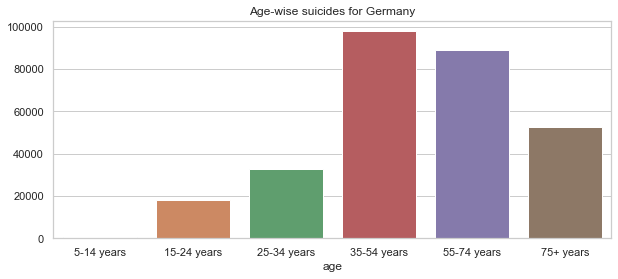

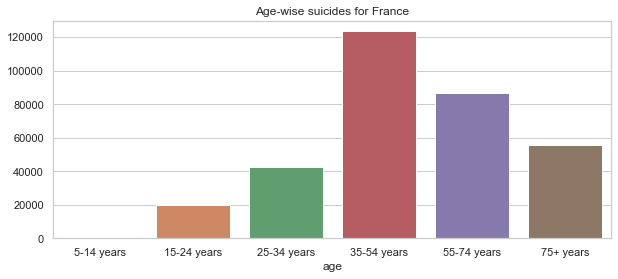

In [26]:
age_grps = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
for country in top6_countries_suicides:
    plt.figure(figsize=(10, 4))
    dat = data[data.country == country].groupby('age').suicides_no.sum()
    sns.barplot(x=dat.index, y=dat.values, order=age_grps)
    plt.title(f'Age-wise suicides for {country}')
    plt.show()

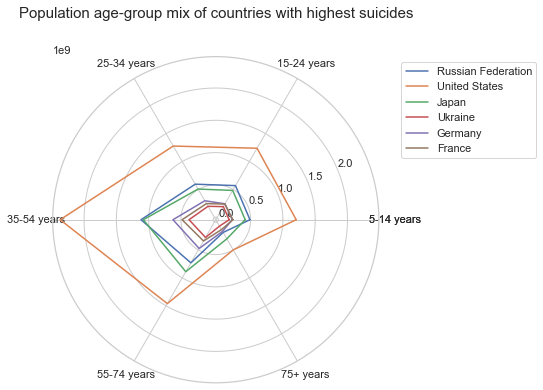

In [27]:
cats = [*age_grps, age_grps[0]]

angles = np.linspace(0, 2*np.pi, len(cats))

plt.figure(figsize=(6, 6))
plt.subplot(polar=True)

for country in top6_countries_suicides:
    dat = data[data.country == country].groupby('age').population.sum()[age_grps].values
    dat = np.append(dat, dat[0])
    plt.plot(angles, dat, label=country)
    
plt.title('Population age-group mix of countries with highest suicides\n', size=15)
plt.thetagrids(np.degrees(angles), labels=cats)
plt.legend(bbox_to_anchor=(1.5, 1))
plt.show()

From the similarity in shape of plot for all countries, we observe that the age-group mix is similar in all countries. All these countries are relatively on the older side, with most of the population being contributed by the **35-54** and **55-74** age groups. The lowest contribution is also observed to be from the **75+** and **5-14** age groups.

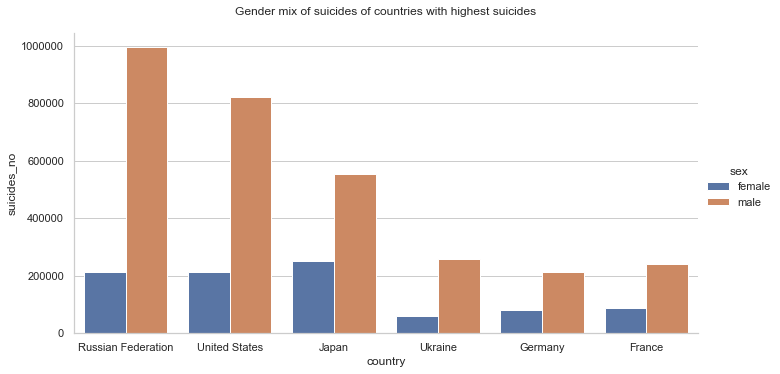

In [28]:
df = data[data.country.isin(top6_countries_suicides)].groupby(['country', 'sex']).sum().reset_index()
g = sns.catplot(x='country', y='suicides_no', hue='sex', data=df, kind='bar',
                height=5, aspect=2, order=top6_countries_suicides)
plt.title('Gender mix of suicides of countries with highest suicides\n ')
plt.show()

This plot clearly that male suicides are higher than female suicides

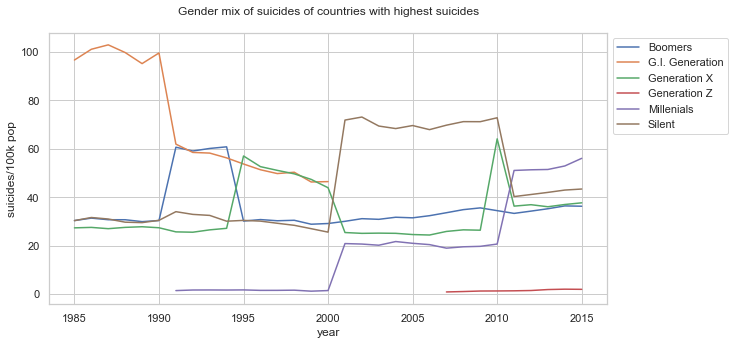

Boomers: 1994
G.I. Generation: 1987
Generation X: 2010
Generation Z: 2014
Millenials: 2015
Silent: 2002


In [29]:
df = data[data.country == 'United States'].groupby(['generation', 'year']).sum().reset_index()
plt.figure(figsize=(10,5))
g = sns.lineplot(x='year', y='suicides/100k pop', hue='generation', data=df)
plt.title('Gender mix of suicides of countries with highest suicides\n ')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()
# Worst year for each generation
# (Can be identified as year corresponding to the highest point on respective line plot):
temp = df[['generation', 'year']].loc[df.groupby('generation')['suicides/100k pop'].idxmax()].values.tolist()
print(*[f'{k}: {v}' for k,v in temp], sep="\n")

In [30]:
def plot_sex_age_mix(data, country, year):
    df = data[(data.year == year) & (data.country == country)]
    df = df.groupby(['sex', 'age']).population.sum()

    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(5,5))

    sns.barplot(x=df.female.index, y=df.female.values, ax=ax1, color='blue', order=age_grps)
    sns.barplot(x=df.male.index, y=df.male.values, ax=ax2, color='orange', order=age_grps)
    ax2.invert_yaxis()
    ax1.set_ylabel('Population (Female)')
    ax2.set_ylabel('Population (Male)')

    fig.suptitle(f'Sex-mix age-group wise for {country}\n')
    plt.xticks(rotation = '90')
    plt.show()

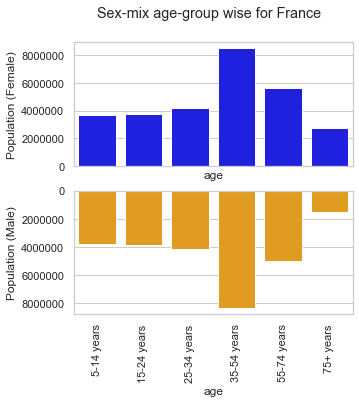

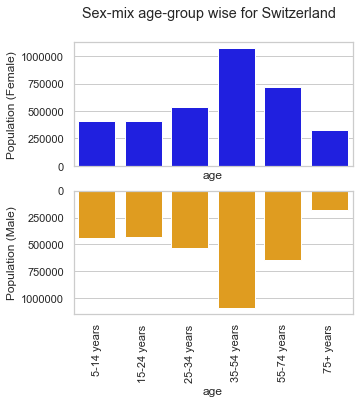

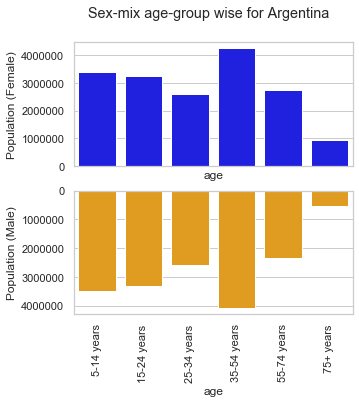

In [31]:
countries, year = ['France', 'Switzerland', 'Argentina'], 2000

for country in countries:
    plot_sex_age_mix(data, country, year)

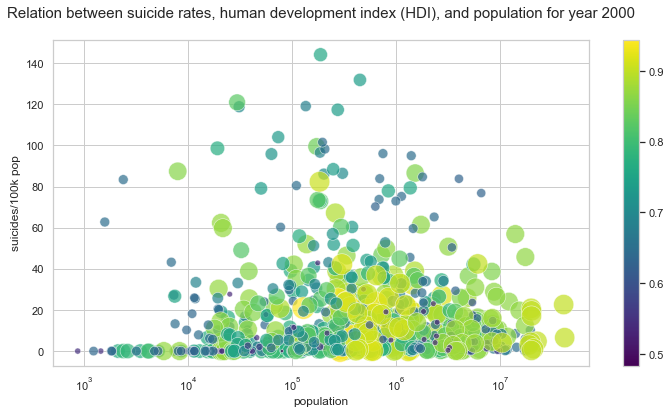

In [32]:
df = data.dropna()[data.year==2000]
plt.figure(figsize=(12,6))
df['hdi_transform'] = np.exp(5*df['HDI for year']) # spreading out the data using exponential transform for bubble-size
g = sns.scatterplot(data=df, x='population', y='suicides/100k pop', size='hdi_transform',
                    hue='HDI for year', palette='viridis', legend=False, sizes=(10, 500), alpha=0.7)
g.set_xscale("log")
norm = plt.Normalize(data['HDI for year'].min(), data['HDI for year'].max())
scmp = plt.cm.ScalarMappable(cmap=sns.color_palette("viridis", as_cmap=True), norm=norm)
scmp.set_array([])
plt.colorbar(scmp)
plt.title('Relation between suicide rates, human development index (HDI), and population for year 2000\n', size=15)
plt.show()

We can see that most of the higher HDI datapoints are closer to the X-axis. This seems to imply that suicide rate is lower when human development index (HDI) is higher.

### References

* [QQ PLot inference](https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot)
* [Kolmogorov–Smirnov test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test)